In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('C:/Users/gokul/food_ingredients_dataset.csv')
dataset.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)
dataset.head()

,Unnamed,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,cows milk,eggs,tree nuts,peanuts,shellfish,wheat,soy,fish
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",1,0,0,0,0,1,0,0
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",0,1,0,0,0,0,0,0
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",1,0,0,0,0,0,0,0
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",1,1,0,0,0,0,0,0
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",1,0,0,0,0,0,0,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13461 entries, 0 to 13460
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed              13461 non-null  int64 
 1   Title                13456 non-null  object
 2   Ingredients          13461 non-null  object
 3   Instructions         13453 non-null  object
 4   Image_Name           13461 non-null  object
 5   Cleaned_Ingredients  13461 non-null  object
 6   cows milk            13461 non-null  int64 
 7   eggs                 13461 non-null  int64 
 8   tree nuts            13461 non-null  int64 
 9   peanuts              13461 non-null  int64 
 10  shellfish            13461 non-null  int64 
 11  wheat                13461 non-null  int64 
 12  soy                  13461 non-null  int64 
 13  fish                 13461 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.4+ MB


In [4]:
common_allergens = {
    'cows milk': {'Cheese', 'Butter', 'Margarine', 'Yogurt', 'Cream', 'Ice cream'},
    'eggs': {'egg'},
    'tree nuts': {'Brazil nut', 'Almond', 'Cashew', 'Macadamia nut', 'Pistachio','Pine nut','Walnut'},
    'peanuts': {'peanut'},
    'shellfish': {'Shrimp','Prawn','Crayfish', 'Lobster', 'Squid', 'Scallops'},
    'wheat': {'flour', 'wheat', 'pasta', 'noodle', 'bread', 'crust'},
    'soy': {'soy', 'tofu', 'soya'},
    'fish': {'fish', 'seafood'}
}

In [5]:
allergens = dataset.columns[6:].tolist()

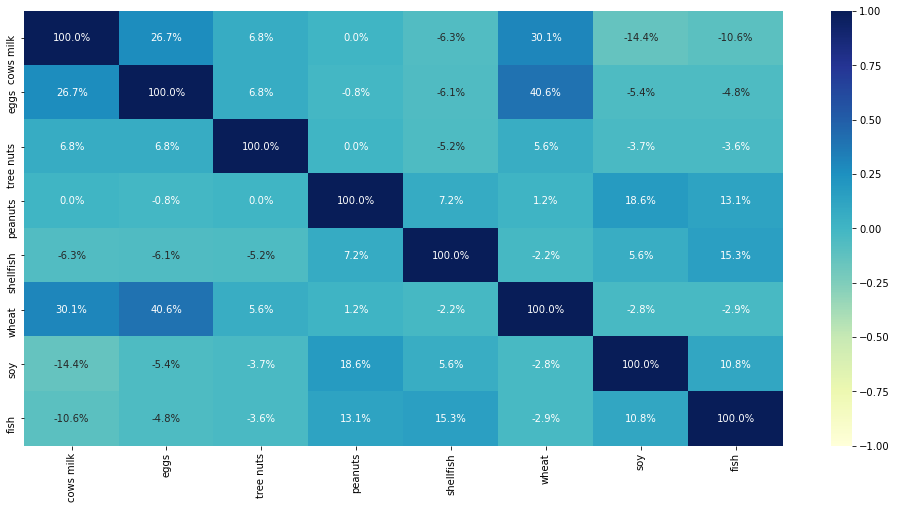

In [6]:
cor_allergens = np.corrcoef(np.stack(dataset[allergens].applymap(lambda x: 1 if x>0 else 0).values, 0).T)
fig, ax1 = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(cor_allergens, annot=True, fmt='2.1%', ax=ax1, cmap='YlGnBu', vmin=-1, vmax=1)
ax1.set_xticklabels(allergens, rotation=90)
ax1.set_yticklabels(allergens);

[Text(0.5, 1.0, 'Recipes Contains Soy Allergens'), Text(0.5, 0, 'Soy')]

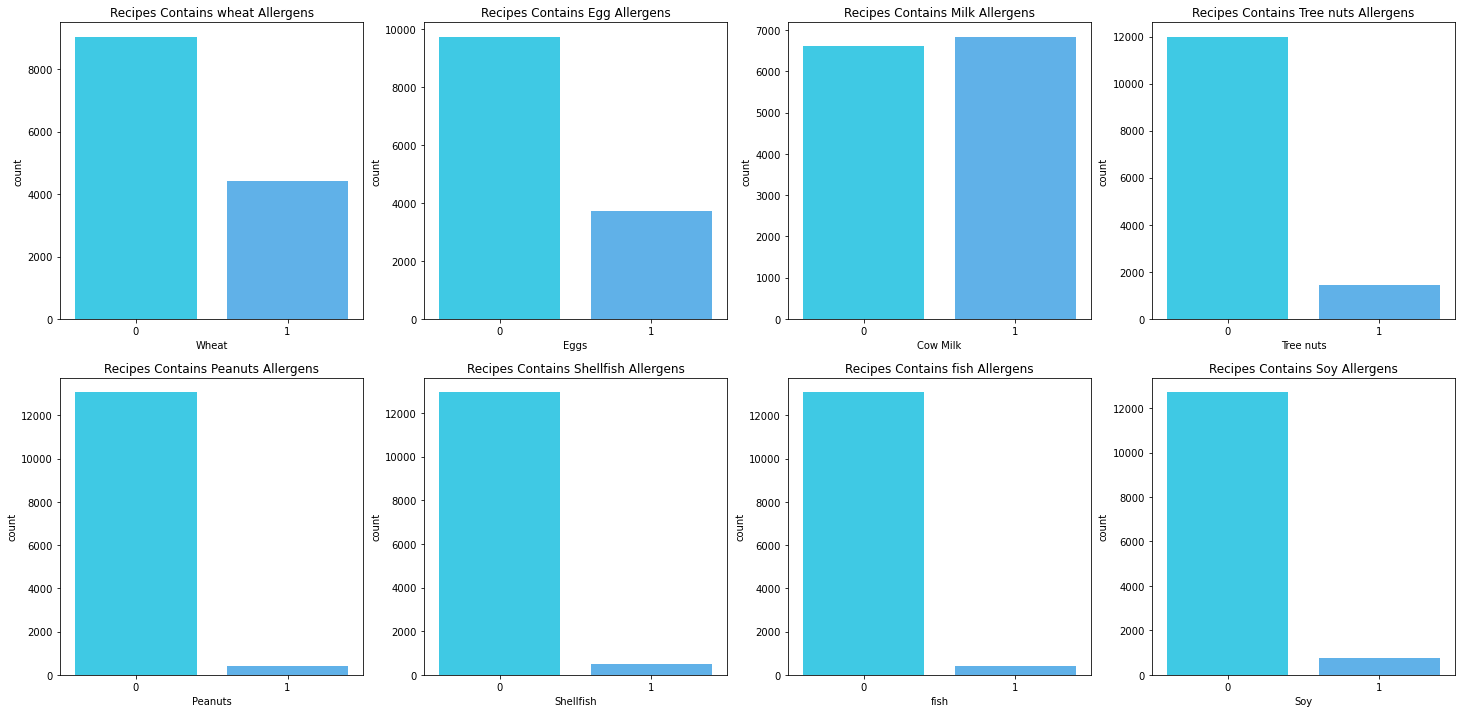

In [7]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(25,12))
CPalette1=sns.color_palette("cool")
sns.countplot(x='wheat', data=dataset,palette=CPalette1,ax=ax[0,0]).set(title='Recipes Contains wheat Allergens', xlabel='Wheat')
sns.countplot(x='eggs', data=dataset,palette=CPalette1,ax=ax[0,1]).set(title='Recipes Contains Egg Allergens', xlabel='Eggs')
sns.countplot(x='cows milk', data=dataset,palette=CPalette1,ax=ax[0,2]).set(title='Recipes Contains Milk Allergens', xlabel='Cow Milk')
sns.countplot(x='tree nuts', data=dataset,palette=CPalette1,ax=ax[0,3]).set(title='Recipes Contains Tree nuts Allergens', xlabel='Tree nuts')
sns.countplot(x='peanuts', data=dataset,palette=CPalette1,ax=ax[1,0]).set(title='Recipes Contains Peanuts Allergens', xlabel='Peanuts')
sns.countplot(x='shellfish', data=dataset,palette=CPalette1,ax=ax[1,1]).set(title='Recipes Contains Shellfish Allergens', xlabel='Shellfish')
sns.countplot(x='fish', data=dataset,palette=CPalette1,ax=ax[1,2]).set(title='Recipes Contains fish Allergens', xlabel='fish')
sns.countplot(x='soy', data=dataset,palette=CPalette1,ax=ax[1,3]).set(title='Recipes Contains Soy Allergens', xlabel='Soy')